# Problem 2

Use this notebook to write your code for problem 2b. Some code snippets from the notebook used in Recitation 1 may be useful to you as examples for using numpy and scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import csv

%matplotlib inline

In [2]:
#==============================================
# TODO: Implement your code for Problem 2 here.
# Use as many cells as you need.
#==============================================

with open('bv_data.csv', 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
        del(data[0])
        data = [[float(pt[0]),float(pt[1])] for pt in data]

In [3]:
X = [pt[0] for pt in data]
y = [pt[1] for pt in data]

In [4]:
def learningCurve(X,y,degree):
    Ns = range(20,105,5)
    plt_N, plt_eval, plt_etrain = [],[],[]
    for N in Ns:
        # split into folds
        kf = KFold(n_splits = 5)
        inds = [ind for ind in kf.split(X[:N],y[:N])]

        val_errors = []
        train_errors = []
        for ind in inds:
            # split sets
            train, val = ind
            X_train = [X[i] for i in train]
            y_train = [y[i] for i in train]

            X_val = [X[i] for i in val]
            y_val = [y[i] for i in val]
            
            # evaluate model and errors
            vals = np.polyfit(X_train, y_train, degree)

            train_err = np.mean((np.polyval(vals, X_train) - y_train) ** 2)
            val_err = np.mean((np.polyval(vals, X_val) - y_val) ** 2)

            val_errors.append(val_err)
            train_errors.append(train_err)
        # save results
        plt_N.append(N)
        plt_eval.append(np.mean(val_errors))
        plt_etrain.append(np.mean(train_errors))
    
    # plot results
    plt.plot(plt_N,plt_eval, label = '$E_{val}$')
    plt.plot(plt_N,plt_etrain, label = '$E_{train}$')
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('E')
    plt.ylim(0,3)
    plt.title('degree = ' + str(degree))

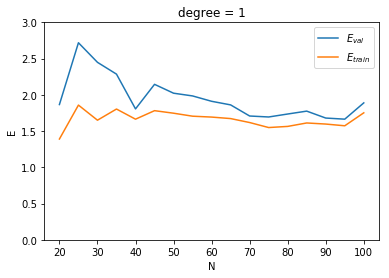

In [5]:
learningCurve(X,y,1)

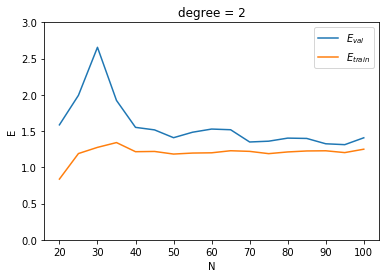

In [6]:
learningCurve(X,y,2)

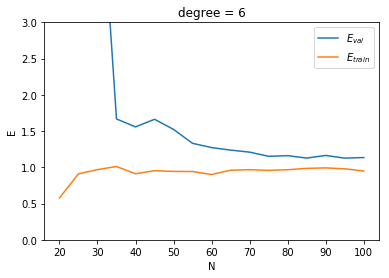

In [7]:
learningCurve(X,y,6)

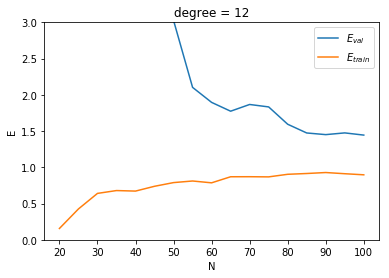

In [8]:
learningCurve(X,y,12)